# Rf 6 0 7_Fitresult
Likelihood and minimization: demonstration of options of the RooFitResult class



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:59 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooAddPdf.h"
#include "RooChebychev.h"
#include "RooFitResult.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
#include "TFile.h"
#include "TStyle.h"
#include "TH2.h"
#include "TMatrixDSym.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create pdf, data
 --------------------------------

Declare observable x

In [3]:
RooRealVar x("x", "x", 0, 10);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two gaussian pdfs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and their parameters

In [4]:
RooRealVar mean("mean", "mean of gaussians", 5, -10, 10);
RooRealVar sigma1("sigma1", "width of gaussians", 0.5, 0.1, 10);
RooRealVar sigma2("sigma2", "width of gaussians", 1, 0.1, 10);

RooGaussian sig1("sig1", "Signal component 1", x, mean, sigma1);
RooGaussian sig2("sig2", "Signal component 2", x, mean, sigma2);

Build chebychev polynomial p.d.f.

In [5]:
RooRealVar a0("a0", "a0", 0.5, 0., 1.);
RooRealVar a1("a1", "a1", -0.2);
RooChebychev bkg("bkg", "Background", x, RooArgSet(a0, a1));

Sum the signal components into a composite signal p.d.f.

In [6]:
RooRealVar sig1frac("sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.);
RooAddPdf sig("sig", "Signal", RooArgList(sig1, sig2), sig1frac);

Sum the composite signal and background

In [7]:
RooRealVar bkgfrac("bkgfrac", "fraction of background", 0.5, 0., 1.);
RooAddPdf model("model", "g1+g2+a", RooArgList(bkg, sig), bkgfrac);

Generate 1000 events

In [8]:
RooDataSet *data = model.generate(x, 1000);

Fit pdf to data, save fitresult
 -------------------------------------------------------------

Perform fit and save result

In [9]:
RooFitResult *r = model.fitTo(*data, Save());

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg,sig1,sig2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 bkgfrac      5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 mean         5.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     4 sig1frac     8.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     5 sigma1       5.00000e-01  2.00000e-01    1.00000e-01  1.00000e+01
     6 sigma2       1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY

Print fit results
 ---------------------------------

Summary printing: basic info plus final values of floating fit parameters

In [10]:
r->Print();


  RooFitResult: minimized FCN value: 1885.34, estimated distance to minimum: 0.000205499
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                    a0    7.2825e-01 +/-  1.11e-01
               bkgfrac    4.3439e-01 +/-  8.36e-02
                  mean    5.0346e+00 +/-  3.36e-02
              sig1frac    7.7835e-01 +/-  9.70e-02
                sigma1    5.2340e-01 +/-  4.51e-02
                sigma2    1.7767e+00 +/-  1.16e+00



Verbose printing: basic info, values of constant parameters, initial and
 final values of floating parameters, global correlations

In [11]:
r->Print("v");


  RooFitResult: minimized FCN value: 1885.34, estimated distance to minimum: 0.000205499
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Constant Parameter    Value     
  --------------------  ------------
                    a1   -2.0000e-01

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                    a0    5.0000e-01    7.2825e-01 +/-  1.11e-01  <none>
               bkgfrac    5.0000e-01    4.3439e-01 +/-  8.36e-02  <none>
                  mean    5.0000e+00    5.0346e+00 +/-  3.36e-02  <none>
              sig1frac    8.0000e-01    7.7835e-01 +/-  9.70e-02  <none>
                sigma1    5.0000e-01    5.2340e-01 +/-  4.51e-02  <none>
                sigma2    1.0000e+00    1.7767e+00 +/-  1.16e+00  <none>



Visualize correlation matrix
 -------------------------------------------------------

Construct 2d color plot of correlation matrix

In [12]:
gStyle->SetOptStat(0);
TH2 *hcorr = r->correlationHist();

Visualize ellipse corresponding to single correlation matrix element

In [13]:
RooPlot *frame = new RooPlot(sigma1, sig1frac, 0.45, 0.60, 0.65, 0.90);
frame->SetTitle("Covariance between sigma1 and sig1frac");
r->plotOn(frame, sigma1, sig1frac, "ME12ABHV");

Access fit result information
 ---------------------------------------------------------

Access basic information

In [14]:
cout << "EDM = " << r->edm() << endl;
cout << "-log(L) at minimum = " << r->minNll() << endl;

EDM = 0.000205499
-log(L) at minimum = 1885.34


Access list of final fit parameter values

In [15]:
cout << "final value of floating parameters" << endl;
r->floatParsFinal().Print("s");

final value of floating parameters
  1) RooRealVar::       a0 = 0.728245 +/- 0.111109
  2) RooRealVar::  bkgfrac = 0.434386 +/- 0.0836079
  3) RooRealVar::     mean = 5.03463 +/- 0.0336219
  4) RooRealVar:: sig1frac = 0.778347 +/- 0.0969912
  5) RooRealVar::   sigma1 = 0.523396 +/- 0.0451307
  6) RooRealVar::   sigma2 = 1.77668 +/- 1.15533


Access correlation matrix elements

In [16]:
cout << "correlation between sig1frac and a0 is  " << r->correlation(sig1frac, a0) << endl;
cout << "correlation between bkgfrac and mean is " << r->correlation("bkgfrac", "mean") << endl;

correlation between sig1frac and a0 is  -0.377851
correlation between bkgfrac and mean is -0.0510232


Extract covariance and correlation matrix as tmatrixdsym

In [17]:
const TMatrixDSym &cor = r->correlationMatrix();
const TMatrixDSym &cov = r->covarianceMatrix();

Print correlation, covariance matrix

In [18]:
cout << "correlation matrix" << endl;
cor.Print();
cout << "covariance matrix" << endl;
cov.Print();

correlation matrix

6x6 matrix is as follows

     |      0    |      1    |      2    |      3    |      4    |
----------------------------------------------------------------------
   0 |          1     -0.7952    -0.02552     -0.3779      0.4111 
   1 |    -0.7952           1    -0.05102      0.6023     -0.3876 
   2 |   -0.02552    -0.05102           1     -0.0873    -0.04206 
   3 |    -0.3779      0.6023     -0.0873           1      0.2966 
   4 |     0.4111     -0.3876    -0.04206      0.2966           1 
   5 |     0.8272     -0.8708     0.01245     -0.2609      0.5799 


     |      5    |
----------------------------------------------------------------------
   0 |     0.8272 
   1 |    -0.8708 
   2 |    0.01245 
   3 |    -0.2609 
   4 |     0.5799 
   5 |          1 

covariance matrix

6x6 matrix is as follows

     |      0    |      1    |      2    |      3    |      4    |
----------------------------------------------------------------------
   0 |    0.01261   -0.0

Persist fit result in root file
 -------------------------------------------------------------

Open new root file save save result

In [19]:
TFile f("rf607_fitresult.root", "RECREATE");
r->Write("rf607");
f.Close();

In a clean root session retrieve the persisted fit result as follows:
 RooFitResult* r = gDirectory->Get("rf607") ;

In [20]:
TCanvas *c = new TCanvas("rf607_fitresult", "rf607_fitresult", 800, 400);
c->Divide(2);
c->cd(1);
gPad->SetLeftMargin(0.15);
hcorr->GetYaxis()->SetTitleOffset(1.4);
hcorr->Draw("colz");
c->cd(2);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.6);
frame->Draw();

Draw all canvases 

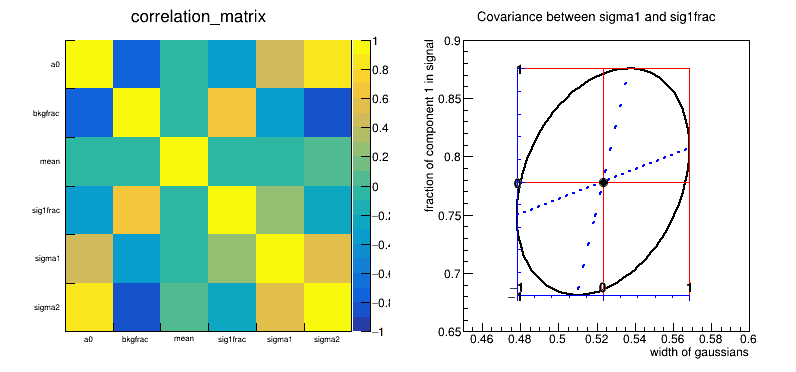

In [21]:
gROOT->GetListOfCanvases()->Draw()